<center>
    <h2>Minor Project (2021-22)</h2>
    <h1>Automated Tool life Prediction System</h1>
    <h3>Team C-19</h3>
    <table>
        <tr>
            <td>Abhinav Gupta</td>
            <td>01FE19BCS239</td>
        </tr>
         <tr>
            <td>Shrinidhi Kulkarni</td>
            <td>01FE19BCS241</td>
        </tr>
         <tr>
            <td>Avantika Shrivastava</td>
            <td>01FE19BCS253</td>
        </tr>
         <tr>
            <td>Allauddin Khan</td>
            <td>01FE20BCS410</td>
        </tr>
    </table>
</center>


### Introduction
Dana Anand India Private Limited designs and manufactures drivetrain products for the OEMs of utility vehicles and commercial vehicles, off-highway and the related aftermarket segments, domestically and internationally. One of the challenges for the company is dissatisfactory utilization of cutting tools.
Therefore, this project aims to utilise the input data from the sensors on the machines to develop an automatic tool life prediction model.

### Problem Statement
Based on data from collected from sensor measurements our task is to build an AI based model that predicts the insert tool life and its effect on product parameters.

### Objectives
1. To build AI based model to recommend whether tool insert is healthy or not.
2. To test the performance of models using measurements like accuracy.
3. To create a web based application that takes input data from database.

# 1.Import Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
%matplotlib inline
import os
import glob
import datetime as dt
from glob import glob as g
import warnings
import pickle
warnings.filterwarnings("ignore")

# 2.Import Datasets
- The dataset from the company contained three-day records from 'MAZAK-FZ' machine.
- Each folder had different csv files for different attributes
- The task is to append all these files into a single dataframe to simplify our study.

In [ ]:
#df1 has data from day 1
df1 = pd.read_csv("Data/Data2/signal_analys_20220418_142047.csv")
df1.dropna(axis='columns',how='all',inplace=True)
df2 = pd.read_csv("Data/Data2/signal_analys_20220418_142115.csv")
df2.dropna(axis='columns',how='all',inplace=True)
df3 = pd.read_csv("Data/Data2/signal_analys_20220418_142159.csv")
df3.dropna(axis='columns',how='all',inplace=True)

FileNotFoundError: ignored

In [ ]:
#Appending required attributes into one frame
ele=pd.DataFrame()
ele['Date']=df1['date']
ele['Servo_Speed_A0']= df1['MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A0-ValueMid']
ele['Servo_Speed_A1']=df1['MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A1-ValueMid']
ele['Servo_Speed_A2']=df1['MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A2-ValueMid']
ele['Servo_Load_A0']=df2['MAZAK_FZ:Servo load MAZAK_FZ P1 A0-ValueMid']
ele['Servo_Load_A1']=df2['MAZAK_FZ:Servo load MAZAK_FZ P1 A1-ValueMid']
ele['Servo_Load_A2']=df2['MAZAK_FZ:Servo load MAZAK_FZ P1 A2-ValueMid']
ele['Servo_Load_Current(%)_A0']=df3['MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A0-ValueMid']
ele['Servo_Load_Current(%)_A1']=df3['MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A1-ValueMid']
ele['Servo_Load_Current(%)_A2']=df3['MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A2-ValueMid']
ele.head()

,Date,Servo_Speed_A0,Servo_Speed_A1,Servo_Speed_A2,Servo_Load_A0,Servo_Load_A1,Servo_Load_A2,Servo_Load_Current(%)_A0,Servo_Load_Current(%)_A1,Servo_Load_Current(%)_A2
0,2022/01/11 00:00:00.000,57.0,-1726.0,0.0,17.5,9.5,77.5,17.5,64.5,-1.5
1,2022/01/11 00:01:00.000,-511.5,1631.5,889.0,17.0,29.5,5.5,70.0,-86.0,74.5
2,2022/01/11 00:02:00.000,0.0,0.0,0.0,21.5,2.0,0.0,21.5,-2.0,0.0
3,2022/01/11 00:03:00.000,0.0,0.0,0.0,21.5,2.0,0.0,21.5,-2.0,0.0
4,2022/01/11 00:04:00.000,0.0,0.0,0.0,21.5,2.0,0.0,21.5,-2.0,0.0


# 3.Explorative Data Analysis
Now we explore data to get insights about data

In [ ]:
# view dimensions of dataset

ele.shape

(1440, 10)

We can see that there are 1440 instances and 10 attributes in the data set.

### Add target attribute
- The tool either 'needs replacement' or 'does not need replacement'.
- Hence, it is a case of binary classification.
- We will classify 'needs replacement' as 1 and 'does not need replacement' as 0.
- From the dataset description of company, for a particular timespan all the records belong to class 0 and rest belong to class 1

In [ ]:
#Adding target attribute
ele['Class'] = 0
ele.iloc[0:467]['Class']=0
ele.iloc[468:]['Class']=1

### Drop redundant columns

We should drop any redundant columns from the dataset which does not have any predictive power. Here, Data is the redundant column.

In [ ]:
ele=ele.drop(['Date'], axis = 1)

In [ ]:
# view summary of dataset

ele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Servo_Speed_A0            1438 non-null   float64
 1   Servo_Speed_A1            1438 non-null   float64
 2   Servo_Speed_A2            1438 non-null   float64
 3   Servo_Load_A0             1438 non-null   float64
 4   Servo_Load_A1             1438 non-null   float64
 5   Servo_Load_A2             1438 non-null   float64
 6   Servo_Load_Current(%)_A0  1438 non-null   float64
 7   Servo_Load_Current(%)_A1  1438 non-null   float64
 8   Servo_Load_Current(%)_A2  1438 non-null   float64
 9   Class                     1440 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 112.6 KB


### Explore problems within variables

In [ ]:
# check missing values in variables

ele.isnull().sum()

Servo_Speed_A0              2
Servo_Speed_A1              2
Servo_Speed_A2              2
Servo_Load_A0               2
Servo_Load_A1               2
Servo_Load_A2               2
Servo_Load_Current(%)_A0    2
Servo_Load_Current(%)_A1    2
Servo_Load_Current(%)_A2    2
Class                       0
dtype: int64

We can see that the all columns except target contains missing values.

# 4.Data Visualization
## Univariate plots
### Check the distribution of variables

Now, we will plot the histograms to check variable distributions to find out if they are normal or skewed.

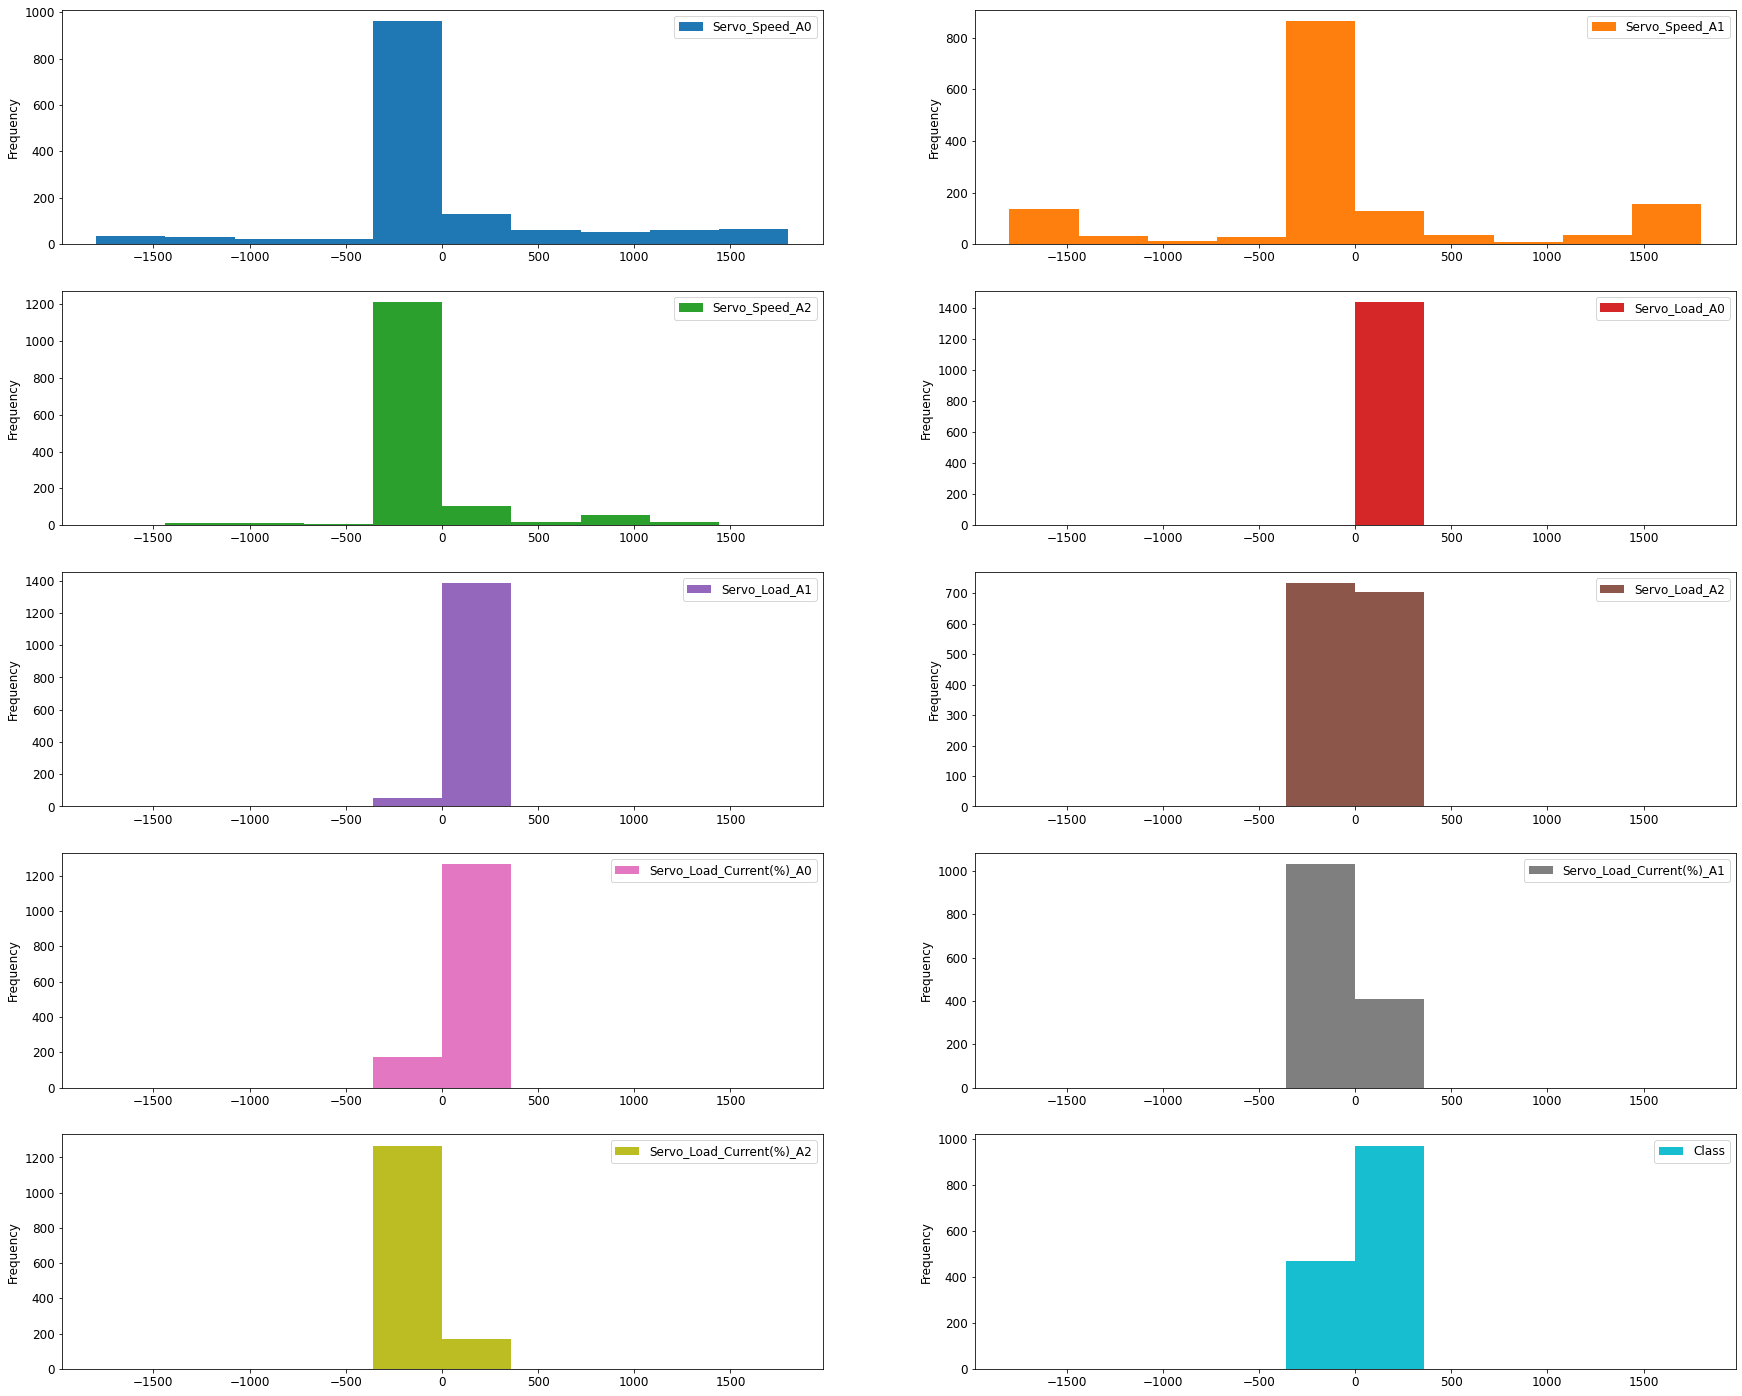

In [ ]:
# plot histograms of the variables


plt.rcParams['figure.figsize']=(30,25)

ele.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

We can see that all the variables in the dataset are skewed in different manner.

## Multivariate plots
### Estimating correlation coefficients

Our dataset is very small. So, we can compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. We can compute it using the df.corr() method as follows:-

In [ ]:
correlation = ele.corr()

In [ ]:
correlation['Class'].sort_values(ascending=False)

Class                       1.000000
Servo_Speed_A1              0.087811
Servo_Load_A1               0.033658
Servo_Load_A0               0.013406
Servo_Load_A2               0.006351
Servo_Load_Current(%)_A1   -0.003979
Servo_Speed_A0             -0.007051
Servo_Load_Current(%)_A2   -0.023688
Servo_Speed_A2             -0.026378
Servo_Load_Current(%)_A0   -0.036329
Name: Class, dtype: float64

#### Interpretation

- The correlation coefficient ranges from -1 to +1.

- When it is close to 0, it means that there is no correlation.

#### Discover patterns and relationships

An important step in EDA is to discover patterns and relationships between variables in the dataset. We will use the seaborn heatmap to explore the patterns and relationships in the dataset

#### Correlation heat Map

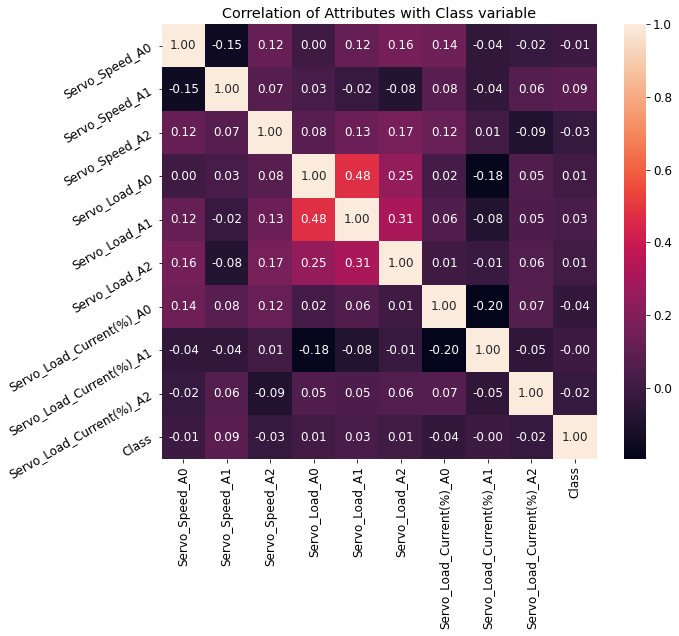

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

We can conclude that there is no strong correlation of Class with any variables.
# 4. Declare feature vector and target variable

In [ ]:
X = ele.drop(['Class'], axis=1)

y = ele['Class']

NameError: ignored

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

### Feature Engineering 

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. We will carry out feature engineering on different types of variables. 

In [ ]:
# check data types in X_train

X_train.dtypes

In [ ]:
# check missing values in numerical variables in X_train

X_train.isnull().sum()

In [ ]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

#### Assumption

- We assume that the data are missing completely at random (MCAR). 
- There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, we will use median imputation because median imputation is robust to outliers.
- We will impute missing values with the appropriate statistical measures of the data, in this case median.
- Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [ ]:
# impute missing values in X_train and X_test with respective column median in X_train

for ele in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        ele[col].fillna(col_median, inplace=True)

In [ ]:
# check again missing values in numerical variables in X_train

X_train.isnull().sum()

In [ ]:
X_train.head()

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling. We will do it as follows.
### Feature Scaling

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.head()

We now have X_train dataset ready to be fed into the Logistic Regression classifier.

# 5. Modelling - Fit K Neighbours Classifier to the training eet 

In [ ]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Predict test set results
y_pred = knn.predict(X_test)

y_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1])

#### predict_proba method

predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.

In [ ]:
# probability of getting output as 0 - does not need replacement

knn.predict_proba(X_test)[:,0]

array([0.66666667, 0.        , 0.        , 0.66666667, 0.33333333,
       1.        , 0.        , 1.        , 0.        , 0.33333333,
       0.        , 0.        , 0.66666667, 0.        , 0.33333333,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 1.        , 0.33333333, 0.33333333, 0.33333333,
       0.        , 0.33333333, 1.        , 0.        , 1.        ,
       0.33333333, 1.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.33333333, 0.        , 1.        , 0.66666667,
       0.        , 0.66666667, 1.        , 0.        , 0.33333333,
       0.        , 1.        , 0.33333333, 0.        , 0.        ,
       0.33333333, 0.        , 0.        , 1.        , 0.33333333,
       0.        , 0.        , 0.        , 0.33333333, 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.33333333,
       1.        , 0.        , 0.        , 0.66666667, 0.     

In [ ]:
# probability of getting output as 1 -  need replacement

knn.predict_proba(X_test)[:,1]

array([0.33333333, 1.        , 1.        , 0.33333333, 0.66666667,
       0.        , 1.        , 0.        , 1.        , 0.66666667,
       1.        , 1.        , 0.33333333, 1.        , 0.66666667,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 0.        , 0.66666667, 0.66666667, 0.66666667,
       1.        , 0.66666667, 0.        , 1.        , 0.        ,
       0.66666667, 0.        , 1.        , 1.        , 1.        ,
       0.66666667, 0.66666667, 1.        , 0.        , 0.33333333,
       1.        , 0.33333333, 0.        , 1.        , 0.66666667,
       1.        , 0.        , 0.66666667, 1.        , 1.        ,
       0.66666667, 1.        , 1.        , 0.        , 0.66666667,
       1.        , 1.        , 1.        , 0.66666667, 0.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.66666667,
       0.        , 1.        , 1.        , 0.33333333, 1.     

# 6. Check Performance

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8194


### Compare the train-set and test-set accuracy

Now, we will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
y_pred_train = knn.predict(X_train)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8854


### Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.8854
Test set score: 0.8194


The training-set accuracy score is 0.8854 while the test-set accuracy to be 0.8194. These two values are quite comparable. So, there is no case of overfitting.

### Compare model accuracy with null accuracy

So, the model accuracy is 0.8194. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [ ]:
# check class distribution in test set

y_test.value_counts()

1    187
0    101
Name: Class, dtype: int64

We can see that the occurences of most frequent class is 187. So, we can calculate null accuracy by dividing 187 by total number of occurences.

In [ ]:
# check null accuracy score

null_accuracy = (187/(187+101))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6493


We can see that our model accuracy score is 0.8194 but null accuracy score is 0.6493. So, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels.

 # 7. Rebuild kNN Classification model using different values of k 
 ### Rebuild kNN Classification model using k=5

In [ ]:
# instantiate the model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(X_train, y_train)


# predict on the test-set
y_pred_5 = knn_5.predict(X_test)


print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.8160


### Rebuild kNN Classification model using k=6

In [ ]:
# instantiate the model with k=6
knn_6 = KNeighborsClassifier(n_neighbors=6)


# fit the model to the training set
knn_6.fit(X_train, y_train)


# predict on the test-set
y_pred_6 = knn_6.predict(X_test)


print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.8160


### Rebuild kNN Classification model using k=7

In [ ]:
# instantiate the model with k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn_7.fit(X_train, y_train)


# predict on the test-set
y_pred_7 = knn_7.predict(X_test)


print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.8229


### Rebuild kNN Classification model using k=8

In [ ]:
# instantiate the model with k=8
knn_8 = KNeighborsClassifier(n_neighbors=8)


# fit the model to the training set
knn_8.fit(X_train, y_train)


# predict on the test-set
y_pred_8 = knn_8.predict(X_test)


print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Model accuracy score with k=8 : 0.8229


### Rebuild kNN Classification model using k=10

In [ ]:
# instantiate the model with k=10
knn_10 = KNeighborsClassifier(n_neighbors=10)


# fit the model to the training set
knn_10.fit(X_train, y_train)


# predict on the test-set
y_pred_10 = knn_10.predict(X_test)


print('Model accuracy score with k=10 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_10)))

Model accuracy score with k=10 : 0.8264


### Rebuild kNN Classification model using k=12

In [ ]:
# instantiate the model with k=12
knn_12 = KNeighborsClassifier(n_neighbors=12)


# fit the model to the training set
knn_12.fit(X_train, y_train)


# predict on the test-set
y_pred_12 = knn_11.predict(X_test)


print('Model accuracy score with k=12 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_12)))

Model accuracy score with k=12 : 0.8194


#### Interpretation

- Our original model accuracy score with k=3 is 0.8194. Now, we can see that we get decreased accuracy score of 0.8164 with k=5 and k=6. But, if we increase the value of k further, this would result in enhanced accuracy.

- With k=7 and k=8 we get accuracy score of 0.8229. Later for k= 10,we get accuracy score of 0.8264. So, it results in performance improvement.

- If we increase k to 12, then accuracy decreases again to 0.8194.

- Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

# 8. Confusion matrix 

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

- True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

- True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

- False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

- False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [ ]:
# Print the Confusion Matrix with k =3 and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_10)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 62  39]
 [ 11 176]]

True Positives(TP) =  62

True Negatives(TN) =  176

False Positives(FP) =  39

False Negatives(FN) =  11


The confusion matrix shows 62 + 176 = 238 correct predictions and 38 + 14 = 50 incorrect predictions.

<AxesSubplot:>

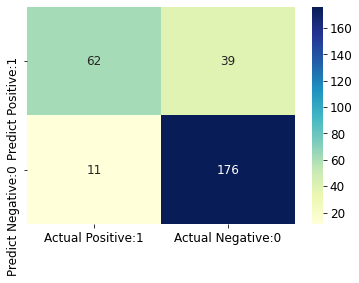

In [ ]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# 9. Classification metrices
## Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

We can print a classification report as follows:-

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_10))

              precision    recall  f1-score   support

           0       0.85      0.61      0.71       101
           1       0.82      0.94      0.88       187

    accuracy                           0.83       288
   macro avg       0.83      0.78      0.79       288
weighted avg       0.83      0.83      0.82       288



### Classification Accuracy

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8264


### Classification Error

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1736


### Precision

Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.6139


### Recall

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8493


### True Positive Rate

True Positive Rate is synonymous with Recall.

In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8493


### False Positive Rate

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1814


### Specificity

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8186


### f1-score

f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

### Support

Support is the actual number of occurrences of the class in our dataset.

In [ ]:
#Adjusting Classification threshold level
# print the first 10 predicted probabilities of two classes- 2 and 4

y_pred_prob = knn.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667]])

### Classification threshold level

There is a classification threshold level of 0.5.

Class 4 - probability of 'needs replacement' is predicted if probability > 0.5.

Class 2 - probability of 'does not needs replacement' is predicted if probability < 0.5.

In [ ]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - Does not Need Replacement(0)', 'Prob of -  Need Replacement(1)'])

y_pred_prob_df

,Prob of - Does not Need Replacement(0),Prob of - Need Replacement(1)
0,0.666667,0.333333
1,0.000000,1.000000
2,0.000000,1.000000
3,0.666667,0.333333
4,0.333333,0.666667
5,1.000000,0.000000
6,0.000000,1.000000
7,1.000000,0.000000
8,0.000000,1.000000
9,0.333333,0.666667


Text(0, 0.5, 'Frequency')

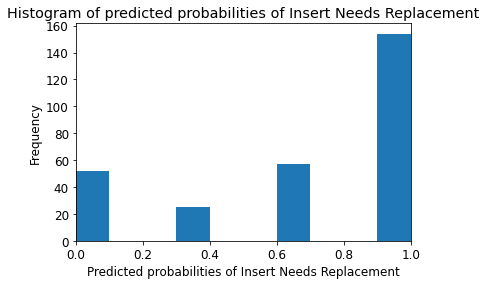

In [ ]:
# store the predicted probabilities for class 1
y_pred_1 = knn.predict_proba(X_test)[:, 1]
# plot histogram of predicted probabilities


# adjust figure size
plt.figure(figsize=(6,4))


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred_1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Insert Needs Replacement')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Insert Needs Replacement')
plt.ylabel('Frequency')

# 10. k-fold Cross Validation

In this section, we will apply k-fold Cross Validation technique to improve the model performance. Cross-validation is a statistical method of evaluating generalization performance It is more stable and thorough than using a train-test split to evaluate model performance.

In [ ]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X_train, y_train, cv = 9, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.8515625 0.8671875 0.859375  0.8359375 0.828125  0.8359375 0.8046875
 0.8046875 0.8046875]


In [ ]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8325


### Interpretation

- Using the mean cross-validation, we can conclude that we expect the model to be around 83.25 % accurate on average.

- If we look at all the 9 scores produced by the 9-fold cross-validation, we can also conclude that there is a relatively variance in the accuracy between folds, ranging from 87% accuracy to 80% accuracy. So, we can conclude that the model is very dependent on the particular folds used for training, but it also be the consequence of the small size of the dataset.

- We can see that 9-fold cross-validation accuracy does not result in performance improvement for this model.

# 11.Exorting Model to Pickle

In [ ]:
import pickle

pickle.dump(knn,open('mode_1.pkl','wb'))
model=pickle.load(open('mode_1.pkl','rb'))

# 12. Results and Conclusion

1. In this project, We build a kNN classifier model to classify the tool insert whether it needs replacement or not. The model yields very good performance as indicated by the model accuracy which was found to be 0.8264 with k=10.

2. With k=3, the training-set accuracy score is 0.8524 while the test-set accuracy to be 0.8194. These two values are quite comparable. So, there is no question of overfitting.

3. We have compared the model accuracy score which is 0.8194 with null accuracy score which is 0.6394. So, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels.


4. Our original model accuracy score with k=3 is 0.8194. Now, we can see that we get decreased accuracy score of 0.8164 with k=5 and k=6. But, if we increase the value of k further, this would result in enhanced accuracy. With k=7 and k=8 we get accuracy score of 0.8229. Later for k= 10,we get accuracy score of 0.8264. So, it results in performance improvement. If we increase k to 12, then accuracy decreases again to 0.8194.So, we can conclude that our optimal value of k is 10.

5. Using the mean cross-validation, we can conclude that we expect the model to be around 83.25 % accurate on average.

6. If we look at all the 9 scores produced by the 9-fold cross-validation, we can also conclude that there is a relatively variance in the accuracy between folds, ranging from 87% accuracy to 80% accuracy. So, we can conclude that the model is very dependent on the particular folds used for training, but it also be the consequence of the small size of the dataset.

